<a href="https://colab.research.google.com/github/smlra-kjsce/Ensemble-Learning/blob/main/Bagging%20Algorithm/Ensemble_Learning_Bagging.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Bagging

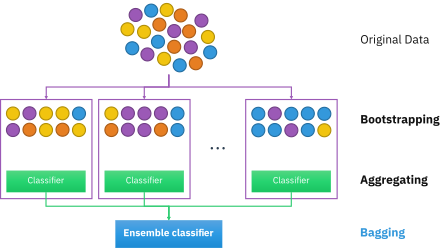

https://upload.wikimedia.org/wikipedia/commons/thumb/c/c8/Ensemble_Bagging.svg/440px-Ensemble_Bagging.svg.png

The term "bagging" comes from the words Bootstrap Aggregator.It fits the base learners (classifiers) on each random subset taken from the original dataset (bootstrapping). Due to the parallel ensemble, all of the classifiers in a training set are independent of each other so that each model will inherit slightly different features.

Next, bagging combines the results of all the learners and adds (aggregates) their prediction by averaging (mean) their outputs to get to final results.

The Random Forest (RF) algorithm can solve the problem of overfitting in decision trees. Random orest is the ensemble of the decision trees. It builds a forest of many random decision trees.

The process of RF and Bagging is almost the same. RF selects only the best features from the subset to split the node.

The diverse outcomes reduce the variance to give smooth predictions.

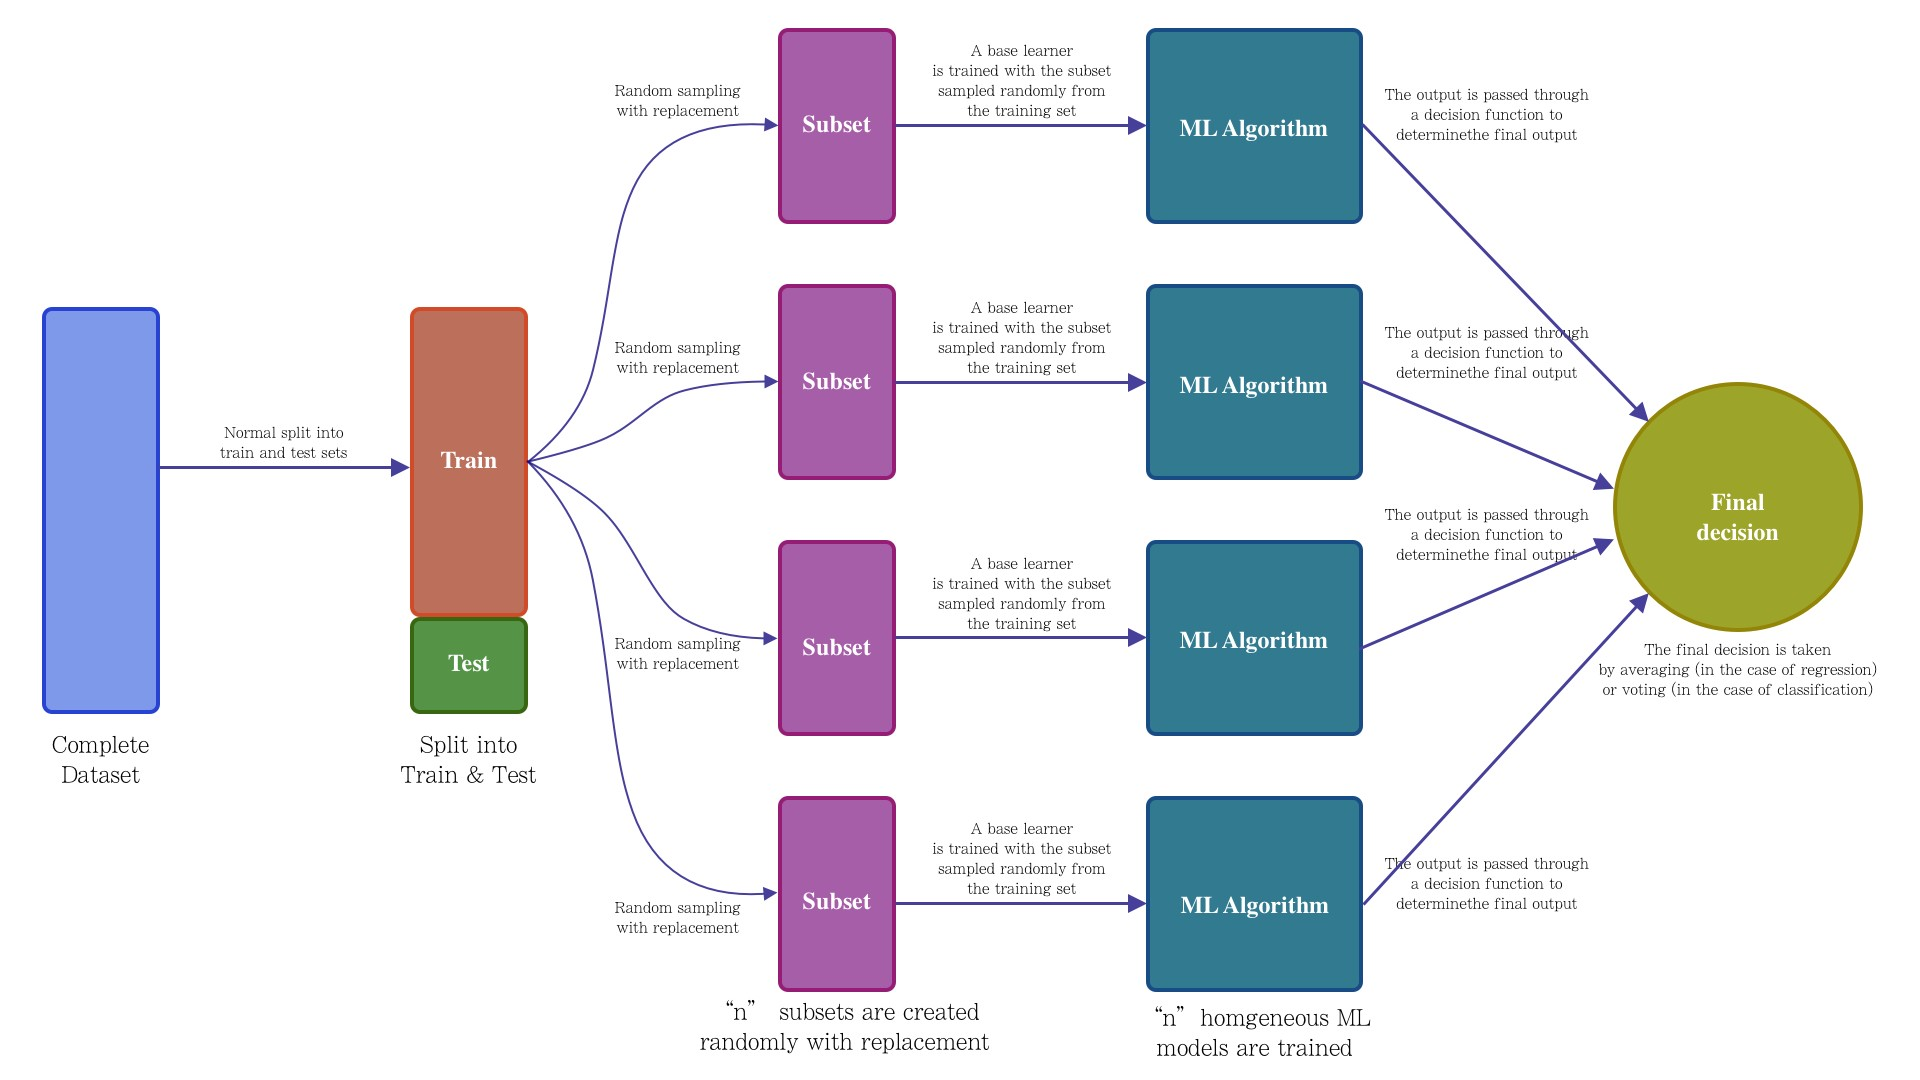

Difference Between Bagging and Boosting

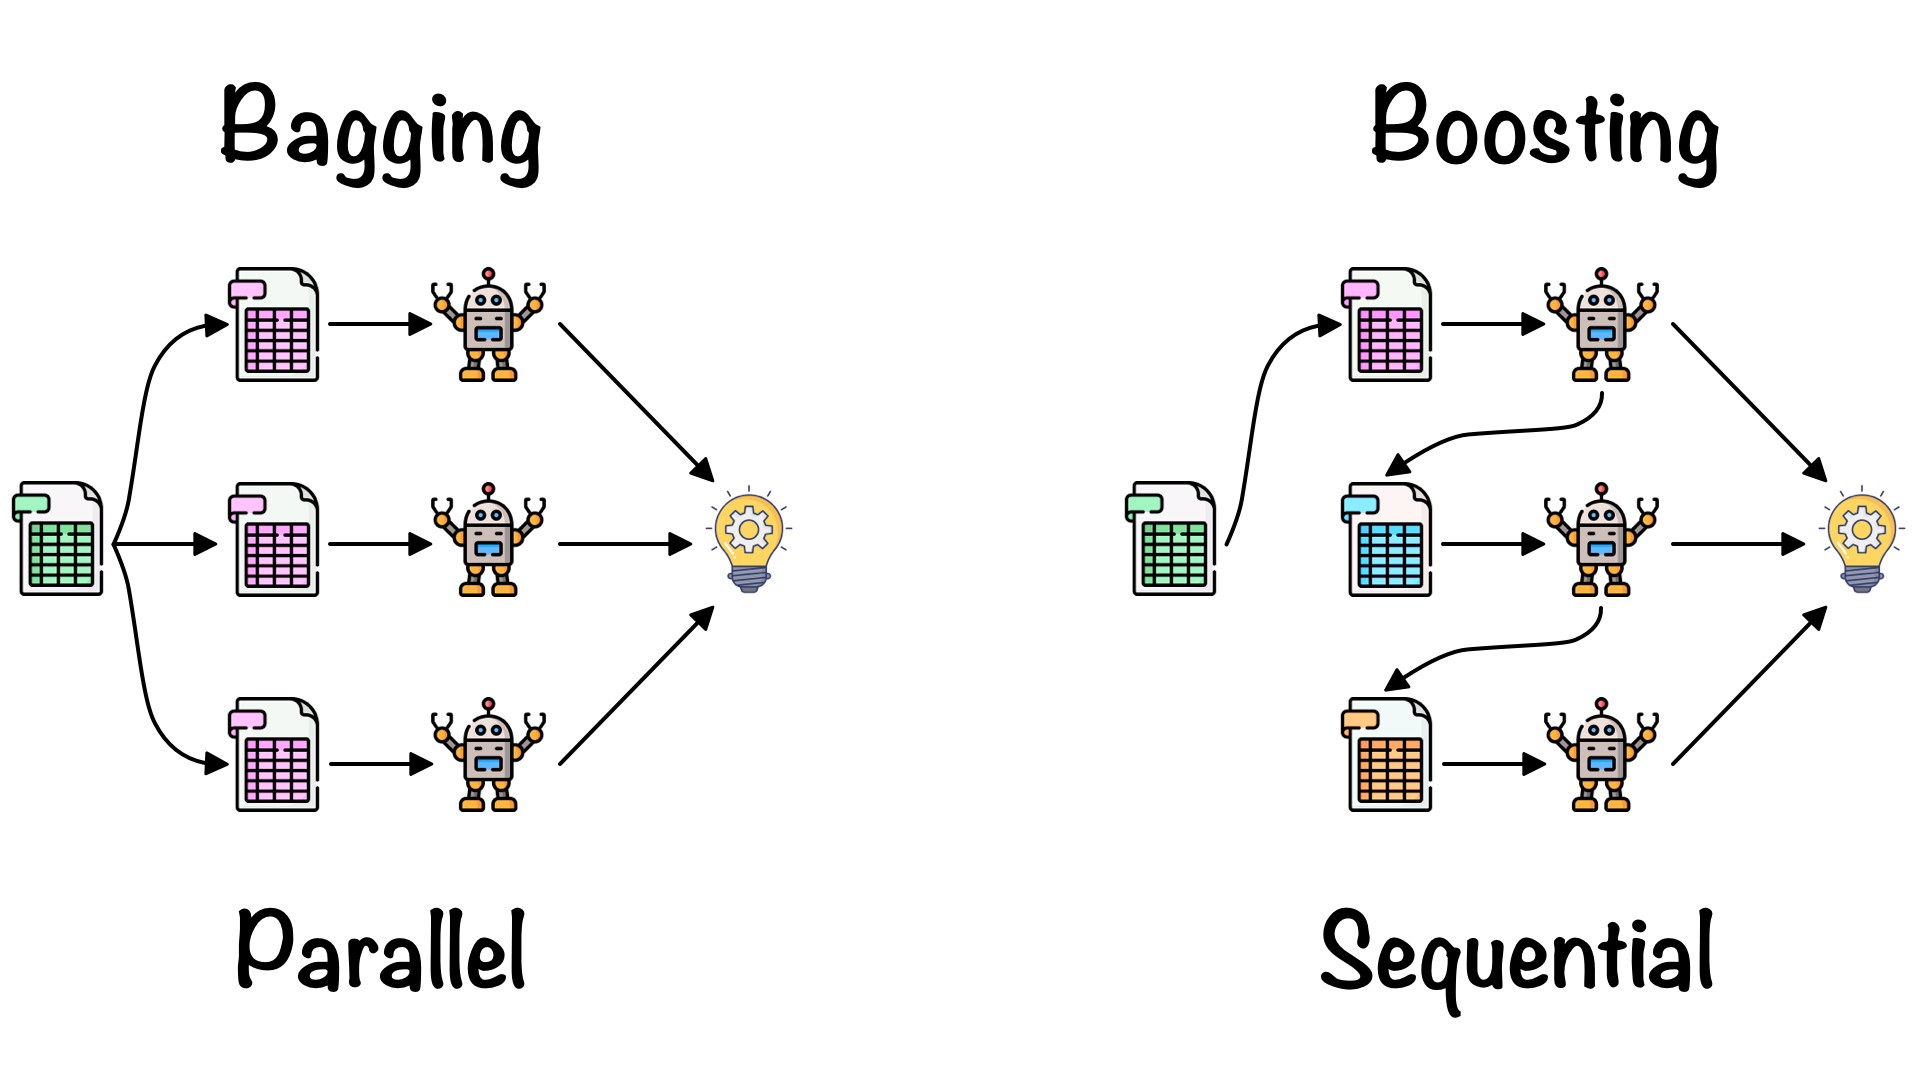

https://miro.medium.com/max/2000/1*zTgGBTQIMlASWm5QuS2UpA.jpeg

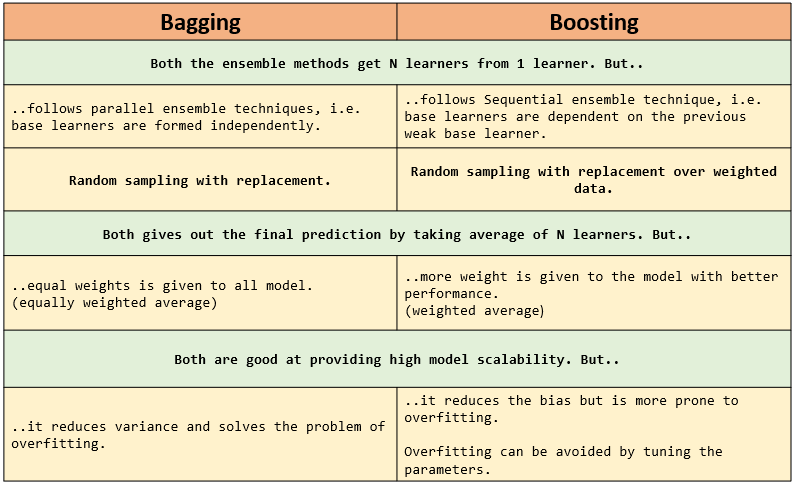

In [ ]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score
from mlxtend.plotting import plot_decision_regions

In [ ]:
data = load_iris()

In [ ]:
data.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [ ]:
data.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [ ]:
data_frame = {
    'sepal length (cm)': data.data[50:,0],
    # 'sepal width (cm)': data.data[50:,1],
    'petal length (cm)': data.data[50:,2],
    # 'petal width (cm)': data.data[50:,3],
    # 'Species': np.array([i for i in data.target if i>0])
    'Species': data.target[50:]
}

In [ ]:
df =pd.DataFrame(data_frame)
df

,sepal length (cm),petal length (cm),Species
0,7.0,4.7,1
1,6.4,4.5,1
2,6.9,4.9,1
3,5.5,4.0,1
4,6.5,4.6,1
...,...,...,...
95,6.7,5.2,2
96,6.3,5.0,2
97,6.5,5.2,2
98,6.2,5.4,2


In [ ]:
df.nunique()

sepal length (cm)    28
petal length (cm)    34
Species               2
dtype: int64

In [ ]:
# Shuffel data set
df = df.sample(df.shape[0])
df

,sepal length (cm),petal length (cm),Species
76,6.2,4.8,2
23,6.1,4.7,1
52,7.1,5.9,2
37,6.3,4.4,1
7,4.9,3.3,1
...,...,...,...
91,6.9,5.1,2
64,5.8,5.1,2
13,6.1,4.7,1
92,5.8,5.1,2


In [ ]:
df_train = df.iloc[:60,:].sample(10)
dt_test = df.iloc[61:,:].sample(10)


In [ ]:
dftest = dt_test.sample(5,replace=True)
x_test = dftest.iloc[:,:-1].values
y_test = dftest.iloc[:,-1].values

In [ ]:
# model
def evaluate(model, x,y):

  model.fit(x,y)
  plot_tree(model)
  plt.show()
  plot_decision_regions(x,y,model,legend=2)
  plt.show()

  y_pred = model.predict(x_test)
  print("y_test:" ,y_test)
  print("y_pred:" ,y_pred)
  print("accuracy score",accuracy_score(y_test,y_pred)*100)
  return model


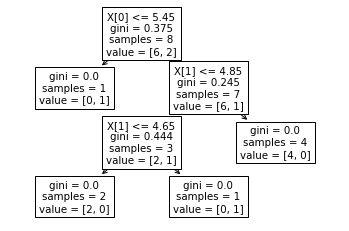

/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


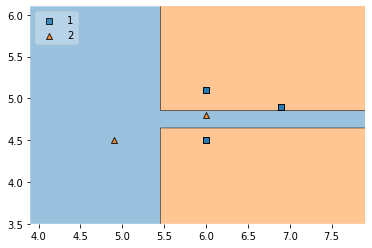

y_test: [2 2 2 2 2]
y_pred: [1 1 1 1 1]
accuracy score 0.0


In [ ]:
df_t = df_train.sample(8,replace = True)
x_train = df_t.iloc[:,:-1].values
y_train = df_t.iloc[:,-1].values
dt1 = DecisionTreeClassifier()
bag1 = evaluate(dt1,x_train,y_train)

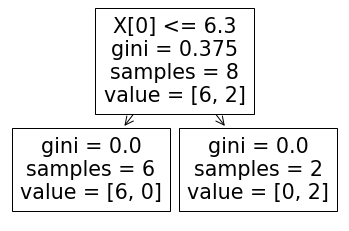

/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


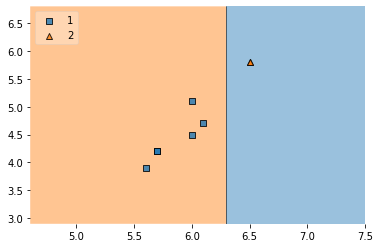

y_test: [2 2 2 2 2]
y_pred: [2 2 1 1 1]
accuracy score 40.0


In [ ]:
df_t = df_train.sample(8,replace = True)
x_train = df_t.iloc[:,:-1].values
y_train = df_t.iloc[:,-1].values
dt1 = DecisionTreeClassifier()
bag2 = evaluate(dt1,x_train,y_train)

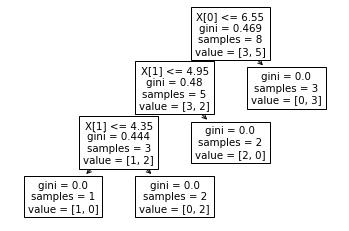

/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


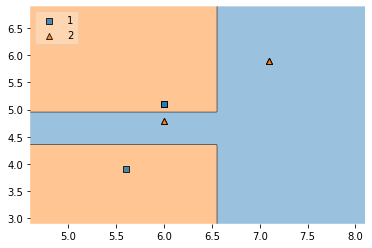

y_test: [2 2 2 2 2]
y_pred: [2 2 1 1 1]
accuracy score 40.0


In [ ]:
df_t = df_train.sample(8,replace = True)
x_train = df_t.iloc[:,:-1].values
y_train = df_t.iloc[:,-1].values
dt1 = DecisionTreeClassifier()
bag3 = evaluate(dt1,x_train,y_train)

In [ ]:
# Aggrigate
print("Predection 1:",bag1.predict(np.array([3.0,2.1]).reshape(1,2)))
print("Predection 2:",bag2.predict(np.array([3.0,2.1]).reshape(1,2)))
print("Predection 3:",bag3.predict(np.array([3.0,2.1]).reshape(1,2)))

Predection 1: [2]
Predection 2: [1]
Predection 3: [1]


<!--  -->
<!--  -->

## The Random Forest Classifier

Random forest, like its name implies, consists of a large number of individual decision trees that operate as an ensemble. Each individual tree in the random forest spits out a class prediction and the class with the most votes becomes our model’s prediction

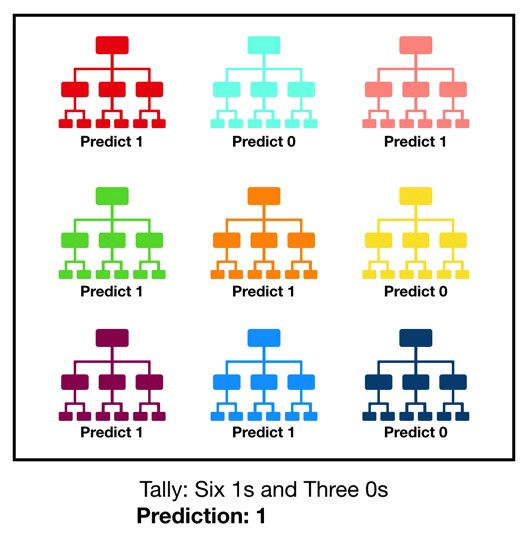

https://miro.medium.com/max/1000/1*VHDtVaDPNepRglIAv72BFg.jpeg

A large number of relatively uncorrelated models (trees) operating as a committee will outperform any of the individual constituent models.

The low correlation between models is the key. Just like how investments with low correlations (like stocks and bonds) come together to form a portfolio that is greater than the sum of its parts, uncorrelated models can produce ensemble predictions that are more accurate than any of the individual predictions. The reason for this wonderful effect is that the trees protect each other from their individual errors (as long as they don’t constantly all err in the same direction). While some trees may be wrong, many other trees will be right, so as a group the trees are able to move in the correct direction. So the prerequisites for random forest to perform well are:

1)There needs to be some actual signal in our features so that models built using those features do better than random guessing.

2)The predictions (and therefore the errors) made by the individual trees need to have low correlations with each other.


## **Math Behind Decision Trees**

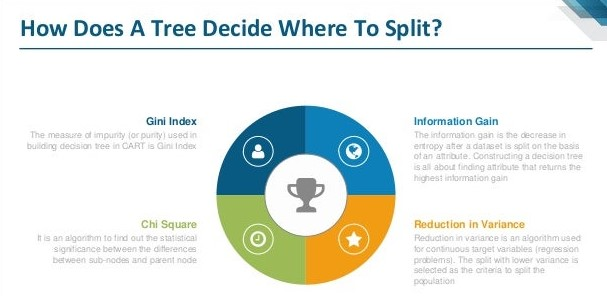

https://image.slidesharecdn.com/decisiontreealgorithm1-181004103807/95/decision-tree-algorithm-decision-tree-in-python-machine-learning-algorithms-edureka-24-638.jpg?cb=1554359794

Entropy = It measures a purity of a split at a node level. Its value ranges from 0 (pure) and 1 (impure).

Here’s the formula for entropy:

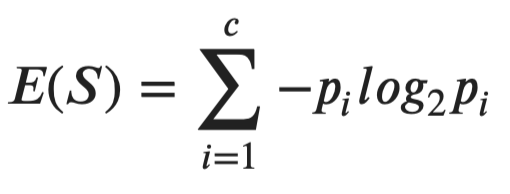

As you can see, it’s a relatively simple equation, so let’s see it in action. Imagine you want to calculate the purity of the following vector:

S = [0,0,0,0,0,0,0,1,1,1]

To summarize, zeros and ones are the class labels with the following counts:

n0 = 7, n1 = 3

Thus the Entropy will be:

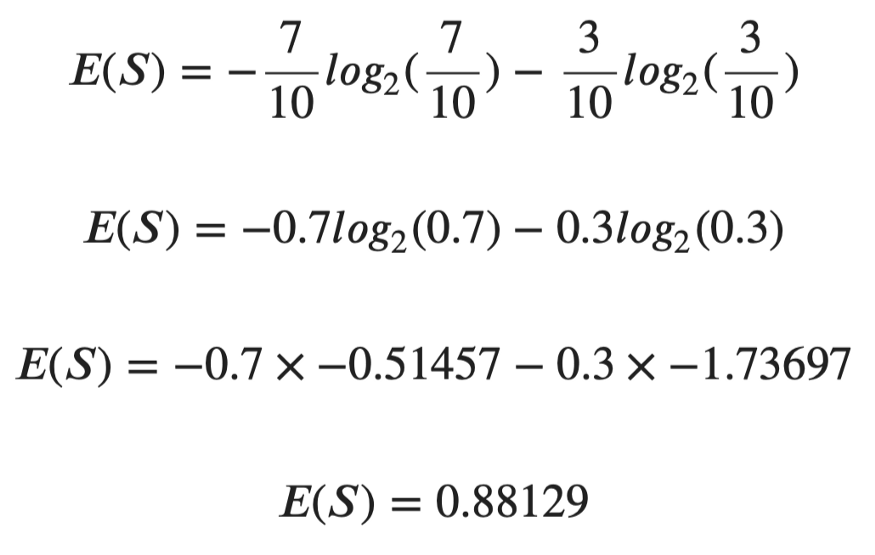

 <!--  -->
 <!--  -->

Information Gain: It represents an average of all entropy values based on a specific split. The higher the information gain value, the better the decision split is.

Information gain can be calculated with the following formula:

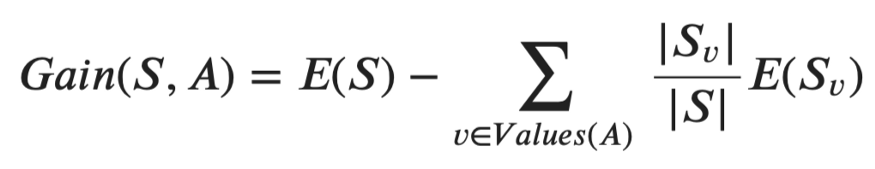

 <!--  -->
 <!--  -->

Random Forest from scratch:

In [ ]:
import random
import pandas as pd
import numpy as np

df = pd.read_csv('/content/drive/MyDrive/ML-DL101 Dataset/train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
df.loc[df['Age'].isnull(),'Age'] = np.round(df['Age'].mean())
df.loc[df['Embarked'].isnull(),'Embarked'] = df['Embarked'].value_counts().index[0]

In [ ]:
features = ['Pclass','Sex','Age','SibSp','Parch', 'Fare', 'Embarked']
nb_train = int(np.floor(0.9 * len(df)))
df = df.sample(frac=1, random_state=217)
X_train = df[features][:nb_train]
y_train = df['Survived'][:nb_train].values
X_test = df[features][nb_train:]
y_test = df['Survived'][nb_train:].values

In [ ]:
def entropy(p):
    if p == 0:
        return 0
    elif p == 1:
        return 0
    else:
        return - (p * np.log2(p) + (1 - p) * np.log2(1-p))

def information_gain(left_child, right_child):
    parent = left_child + right_child
    p_parent = parent.count(1) / len(parent) if len(parent) > 0 else 0
    p_left = left_child.count(1) / len(left_child) if len(left_child) > 0 else 0
    p_right = right_child.count(1) / len(right_child) if len(right_child) > 0 else 0
    IG_p = entropy(p_parent)
    IG_l = entropy(p_left)
    IG_r = entropy(p_right)
    return IG_p - len(left_child) / len(parent) * IG_l - len(right_child) / len(parent) * IG_r

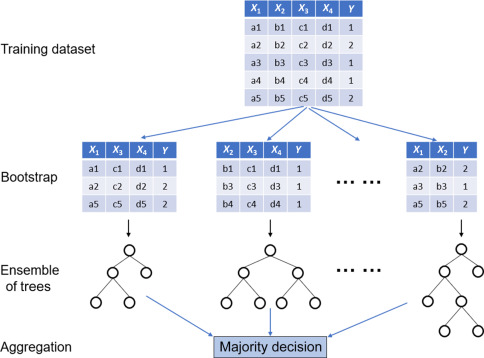

In [ ]:
'''Lets also define a draw_bootstrap function that can take in the training input X in the form of a dataframe and also the output y in the form of an array. 
We'll have it return the bootstrap sampled Xboot and yboot that we'll use to construct a tree. 
We'll also return the out-of-bag observations that were left out for training which we'll call X_oob andy_oob. 
At each new iteration we'll use the OOB samples to evaluate the performance of the tree built with the bootstrapped data. 
So in other words, if we have 100 trees we'll have 100 OOB scores'''


def draw_bootstrap(X_train, y_train):
    bootstrap_indices = list(np.random.choice(range(len(X_train)), len(X_train), replace = True))
    oob_indices = [i for i in range(len(X_train)) if i not in bootstrap_indices]
    X_bootstrap = X_train.iloc[bootstrap_indices].values
    y_bootstrap = y_train[bootstrap_indices]
    X_oob = X_train.iloc[oob_indices].values
    y_oob = y_train[oob_indices]
    return X_bootstrap, y_bootstrap, X_oob, y_oob

def oob_score(tree, X_test, y_test):
    mis_label = 0
    for i in range(len(X_test)):
        pred = predict_tree(tree, X_test[i])
        if pred != y_test[i]:
            mis_label += 1
    return mis_label / len(X_test)

In [ ]:
'''
1]select m features at random
2]for each feature selected, iterate through each value in the bootstrapped dataset and compute the information gain
3]Return a dictionary from the value that gives the highest information gain, which will represent a node in our tree consisting of:
  >(int) the feature index
  >(int) the value to split at
  >(dictionary) left child node
  >(dictionary) right child node'''



def find_split_point(X_bootstrap, y_bootstrap, max_features):
    feature_ls = list()
    num_features = len(X_bootstrap[0])
    
    while len(feature_ls) <= max_features:
        feature_idx = random.sample(range(num_features), 1)
        if feature_idx not in feature_ls:
            feature_ls.extend(feature_idx)
    
    best_info_gain = -999
    node = None
    for feature_idx in feature_ls:
        for split_point in X_bootstrap[:,feature_idx]:
            left_child = {'X_bootstrap': [], 'y_bootstrap': []}
            right_child = {'X_bootstrap': [], 'y_bootstrap': []}
            
            # split children for continuous variables
            if type(split_point) in [int, float]:
                for i, value in enumerate(X_bootstrap[:,feature_idx]):
                    if value <= split_point:
                        left_child['X_bootstrap'].append(X_bootstrap[i])
                        left_child['y_bootstrap'].append(y_bootstrap[i])
                    else:
                        right_child['X_bootstrap'].append(X_bootstrap[i])
                        right_child['y_bootstrap'].append(y_bootstrap[i])
            # split children for categoric variables
            else:
                for i, value in enumerate(X_bootstrap[:,feature_idx]):
                    if value == split_point:
                        left_child['X_bootstrap'].append(X_bootstrap[i])
                        left_child['y_bootstrap'].append(y_bootstrap[i])
                    else:
                        right_child['X_bootstrap'].append(X_bootstrap[i])
                        right_child['y_bootstrap'].append(y_bootstrap[i])
            
            split_info_gain = information_gain(left_child['y_bootstrap'], right_child['y_bootstrap'])
            if split_info_gain > best_info_gain:
                best_info_gain = split_info_gain
                left_child['X_bootstrap'] = np.array(left_child['X_bootstrap'])
                right_child['X_bootstrap'] = np.array(right_child['X_bootstrap'])
                node = {'information_gain': split_info_gain, 
                        'left_child': left_child, 
                        'right_child': right_child, 
                        'split_point': split_point,
                        'feature_idx': feature_idx}
                
    
    return node

In [ ]:
def terminal_node(node):
    y_bootstrap = node['y_bootstrap']
    pred = max(y_bootstrap, key = y_bootstrap.count)
    return pred


def split_node(node, max_features, min_samples_split, max_depth, depth):
    left_child = node['left_child']
    right_child = node['right_child']

    del(node['left_child'])
    del(node['right_child'])

    if len(left_child['y_bootstrap']) == 0 or len(right_child['y_bootstrap']) == 0:
        empty_child = {'y_bootstrap': left_child['y_bootstrap'] + right_child['y_bootstrap']}
        node['left_split'] = terminal_node(empty_child)
        node['right_split'] = terminal_node(empty_child)
        return

    if depth >= max_depth:
        node['left_split'] = terminal_node(left_child)
        node['right_split'] = terminal_node(right_child)
        return node

    if len(left_child['X_bootstrap']) <= min_samples_split:
        node['left_split'] = node['right_split'] = terminal_node(left_child)
    else:
        node['left_split'] = find_split_point(left_child['X_bootstrap'], left_child['y_bootstrap'], max_features)
        split_node(node['left_split'], max_depth, min_samples_split, max_depth, depth + 1)
    if len(right_child['X_bootstrap']) <= min_samples_split:
        node['right_split'] = node['left_split'] = terminal_node(right_child)
    else:
        node['right_split'] = find_split_point(right_child['X_bootstrap'], right_child['y_bootstrap'], max_features)
        split_node(node['right_split'], max_features, min_samples_split, max_depth, depth + 1)

In [ ]:
def build_tree(X_bootstrap, y_bootstrap, max_depth, min_samples_split, max_features):
    root_node = find_split_point(X_bootstrap, y_bootstrap, max_features)
    split_node(root_node, max_features, min_samples_split, max_depth, 1)
    return root_node

'''
1]n_estimators: (int) The number of trees in the forest.
2]max_features: (int) The number of features to consider when looking for the best split 
3]max_depth: (int) The maximum depth of the tree
4]min_samples_split: (int) The minimum number of samples required to split an internal node'''

def random_forest(X_train, y_train, n_estimators, max_features, max_depth, min_samples_split):
    tree_ls = list()
    oob_ls = list()
    for i in range(n_estimators):
        X_bootstrap, y_bootstrap, X_oob, y_oob = draw_bootstrap(X_train, y_train)
        tree = build_tree(X_bootstrap, y_bootstrap, max_features, max_depth, min_samples_split)
        tree_ls.append(tree)
        oob_error = oob_score(tree, X_oob, y_oob)
        oob_ls.append(oob_error)
    print("OOB estimate: {:.2f}".format(np.mean(oob_ls)))
    return tree_ls

In [ ]:
def predict_tree(tree, X_test):
    feature_idx = tree['feature_idx']

    if X_test[feature_idx] <= tree['split_point']:
        if type(tree['left_split']) == dict:
            return predict_tree(tree['left_split'], X_test)
        else:
            value = tree['left_split']
            return value
    else:
        if type(tree['right_split']) == dict:
            return predict_tree(tree['right_split'], X_test)
        else:
            return tree['right_split']

In [ ]:
'''Given a input vector xi we can predict its class given a single tree with predict_tree. 
As a single tree consists of nested dictionaries which each represent a node we can let our xi 
flow through a tree by constantly checking if the split we're at contains another dictionary (node). 
Once we reach a left_split or right_split that does not contain any dictionary we've reached 
the terminal node and we can return the class.'''

def predict_rf(tree_ls, X_test):
    pred_ls = list()
    for i in range(len(X_test)):
        ensemble_preds = [predict_tree(tree, X_test.values[i]) for tree in tree_ls]
        final_pred = max(ensemble_preds, key = ensemble_preds.count)
        pred_ls.append(final_pred)
    return np.array(pred_ls)

In [ ]:
n_estimators = 100
max_features = 3
max_depth = 10
min_samples_split = 2

model = random_forest(X_train, y_train, n_estimators=100, max_features=3, max_depth=10, min_samples_split=2)

OOB estimate: 0.31


In [ ]:
preds = predict_rf(model, X_test)
acc = sum(preds == y_test) / len(y_test)
print("Testing accuracy: {}".format(np.round(acc,3)))

Testing accuracy: 0.678


Bagging using Sklearn module

In [ ]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.datasets import load_iris

x, y = load_iris(return_X_y=True)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=23)

tree = DecisionTreeClassifier(max_depth=3, random_state=23)

bagging = BaggingClassifier(base_estimator=tree, n_estimators=5, max_samples=50, bootstrap=True)

bagging.fit(x_train, y_train)

print(f"Train score: {bagging.score(x_train, y_train)}")
print(f"Test score: {bagging.score(x_test, y_test)}")



Train score: 0.9642857142857143
Test score: 1.0


In [ ]:
from sklearn import model_selection

In [ ]:
iris = load_iris()
X = iris.data
Y = iris.target
X_fit, X_eval, y_fit, y_test= model_selection.train_test_split( X, Y, test_size=0.30, random_state=1 )
seed = 7
kfold = model_selection.KFold(n_splits=10, random_state=seed,shuffle=True)
cart = DecisionTreeClassifier()
num_trees = 100
model = BaggingClassifier(base_estimator=cart, n_estimators=num_trees, random_state=seed)
model.fit(X_fit, y_fit)
pred_label = model.predict(X_eval)
nnz = np.shape(y_test)[0] - np.count_nonzero(pred_label - y_test)
acc = 100*nnz/np.shape(y_test)[0]
print('accuracy is: '+str(acc))

accuracy is: 95.55555555555556


 <!--  -->
 <!--  -->
<!--  -->
 <!--  -->

## **What is Isolation Forest?**

Isolation Forest is used for outlier/anomaly detection
Isolation Forest is an Unsupervised Learning technique (does not need label)
Uses Binary Decision Trees bagging (resembles Random Forest, in supervised learning)


**Hypothesis**

This method isolates anomalies from normal instances, for doing this the following assumptions for anomalies are made:

1] They are a minority consisting of fewer instances.

2] They have attribute-values that are different from normal instances.

In other words, anomalies are “few and different.”

Because of these first two assumptions, anomalies are susceptible to be isolated and this makes them fall closer to the root of the tree.

**Brief description**

Isolation Forest builds an ensemble of Binary Trees for a given dataset. Anomalies, due to their nature, they have the shortest path in the trees than normal instances.

Isolation Forest converges quickly with a very small number of trees and subsampling enables us to achieve good results while being computationally efficient.

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/ML-DL101 Dataset/marks.csv')
df.head(10)

,Student ID,marks
0,1,100
1,2,99
2,3,90
3,4,97
4,5,92
5,6,89
6,7,90
7,8,10000
8,9,92
9,10,86


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


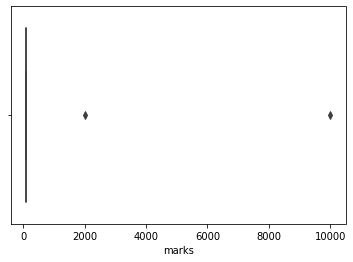

In [ ]:
sns.boxplot(df.marks)

In [ ]:
model=IsolationForest(n_estimators=50, max_samples='auto', contamination=float(0.1),max_features=1.0)
model.fit(df[['marks']])

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  "X does not have valid feature names, but"


IsolationForest(contamination=0.1, n_estimators=50)

In [ ]:
df['scores']=model.decision_function(df[['marks']])
df['anomaly']=model.predict(df[['marks']])
df.head(20)

,Student ID,marks,scores,anomaly
0,1,100,0.216111,1
1,2,99,0.209080,1
2,3,90,0.276994,1
3,4,97,0.217975,1
4,5,92,0.270068,1
5,6,89,0.256212,1
6,7,90,0.276994,1
7,8,10000,-0.180816,-1
8,9,92,0.270068,1
9,10,86,0.135818,1


In [ ]:
anomaly=df.loc[df['anomaly']==-1]
anomaly_index=list(anomaly.index)
print(anomaly)

    Student ID  marks    scores  anomaly
7            8  10000 -0.180816       -1
12          13   2000 -0.090545       -1


In [ ]:
outliers_counter = len(df[df['marks'] > 1000])
outliers_counter

2

In [ ]:
print("Accuracy percentage:", 100*list(df['anomaly']).count(-1)/(outliers_counter))

Accuracy percentage: 100.0


## **Refrences**
1. 
https://www.simplilearn.com/tutorials/machine-learning-tutorial/bagging-in-machine-learning
2. https://towardsdatascience.com/isolation-forest-from-scratch-e7e5978e6f4c
3. https://www.analyticsvidhya.com/blog/2021/07/anomaly-detection-using-isolation-forest-a-complete-guide/
4. https://towardsdatascience.com/master-machine-learning-random-forest-from-scratch-with-python-3efdd51b6d7a
5.   https://carbonati.github.io/posts/random-forests-from-scratch/
6.   https://blog.paperspace.com/anomaly-detection-isolation-forest/
7. https://towardsdatascience.com/decision-tree-and-random-forest-from-scratch-4c12b351fe5e


